# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
boston.data.shape

(506L, 13L)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506L,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

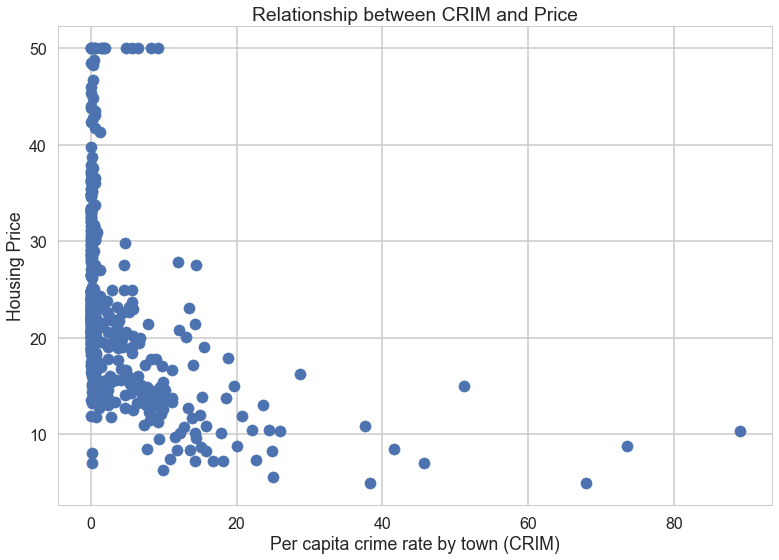

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Exercise 1: 
There is a negative relationship between housing price and the 'per capita crime rate by town' (CRIM) variable. It appears to be non-linear in nature, perhaps logarithmic. There is an interesting cluster of points at the portion of the graph denoting high housing prices and low CRIM. Apparently the maximum housing price in the dataset is 50, and a house can take on this price despite a non-trival amount of variation in the CRIM variable. This same fluctuation is not seen at significantly lower prices, from just below 50 all the way down to 30. It's also worth noting that the low price/high CRIM portion of the graph is very sparsely populated, and these points could be considered outliers.


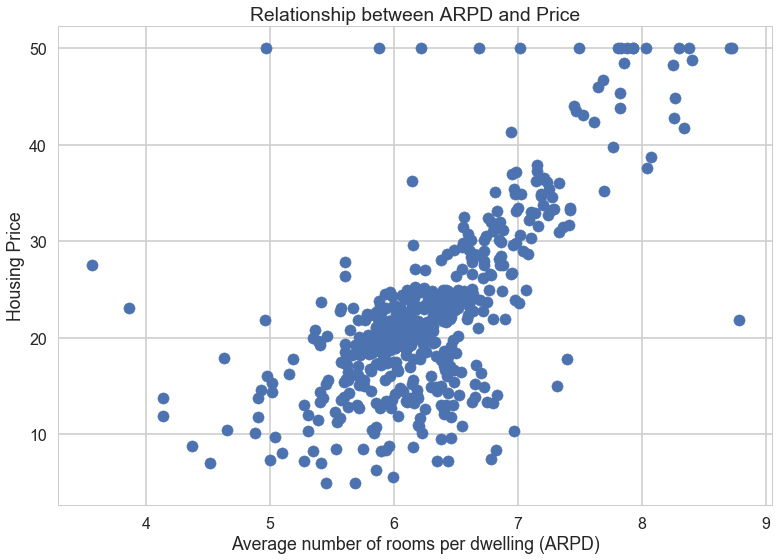

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (ARPD)")
plt.ylabel("Housing Price")
plt.title("Relationship between ARPD and Price")

Exercise 2a:
The relationship between price and average number of rooms per dwelling appears to be generally positive. To say that it is linear might be a stretch but a linear regression could still be useful for interpretation purposes. Similar to the CRIM variable, there is a bit of variation as to what a home with price 50 translates to as far as number of rooms.

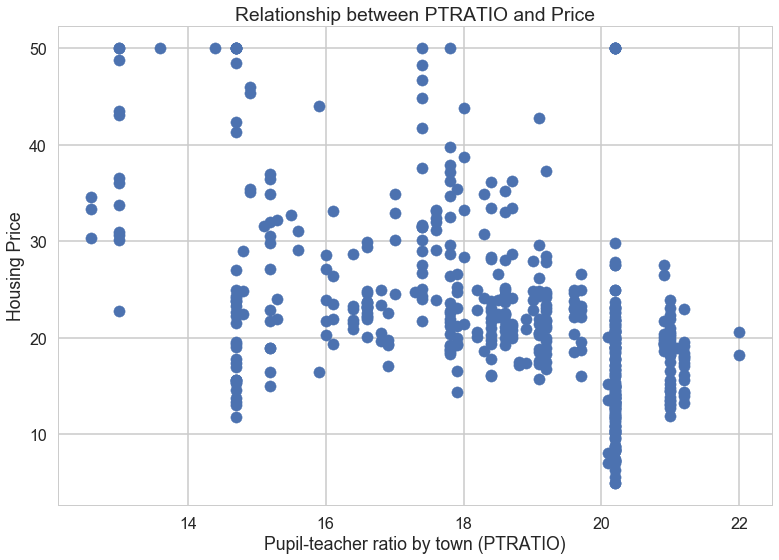

In [14]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Exercise 2b: The relationship between housing price and the pupil-teacher ratio is difficult to see in this plot, but it appears to be somewhat negative (especially given the dearth of points in the lower left and upper right of the graph). Given that it is difficult to see much of a relationship, I would say that you can't call this a linear relationship, but it's not entirely clear if another type of mathematical relationship is more appropriate.

Exercise 3: Several of these statistics look potentially interesting for the purpose of estimating home price by linear regression. I've plotted a few below that I suspected might have a strong relationship.

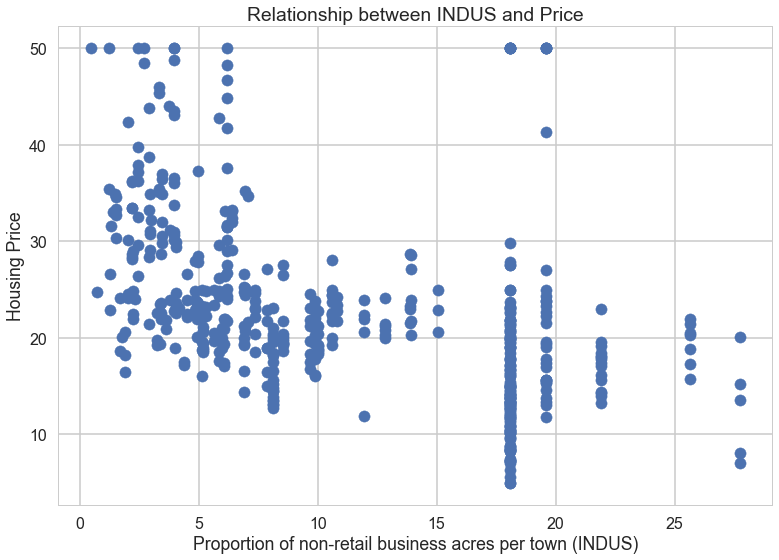

In [15]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town (INDUS)")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

The relationship between the amount of industry in a town and the housing price of a home in that town seems to be negatively correlated (as expected), and the relationship appears to be not entirely linear.

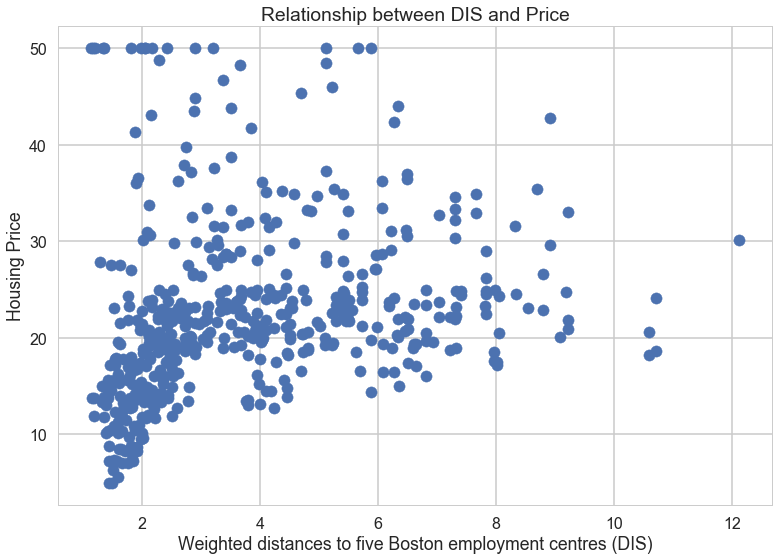

In [16]:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

The relationship between the distance to employment centres and the price of housing appears to be somewhat positive, but the relationship is not particularly strong. I would have expected the relationship to be negative (as I would think that shorter commutes would be more desirable) but perhaps there are other variables at play here.

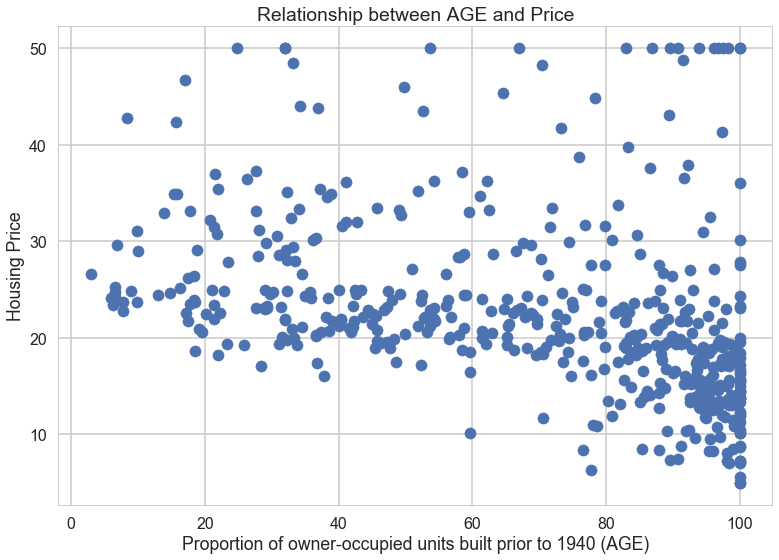

In [17]:
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

The relationship between the owner occupied age of buildings in the neighborhood and price seems to be somewhat negative, which goes along with my intuition that newer/more modern buildings, and neighborhoods with that quality, would be more expensive. However, there is still a large amount of variation within this plot.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

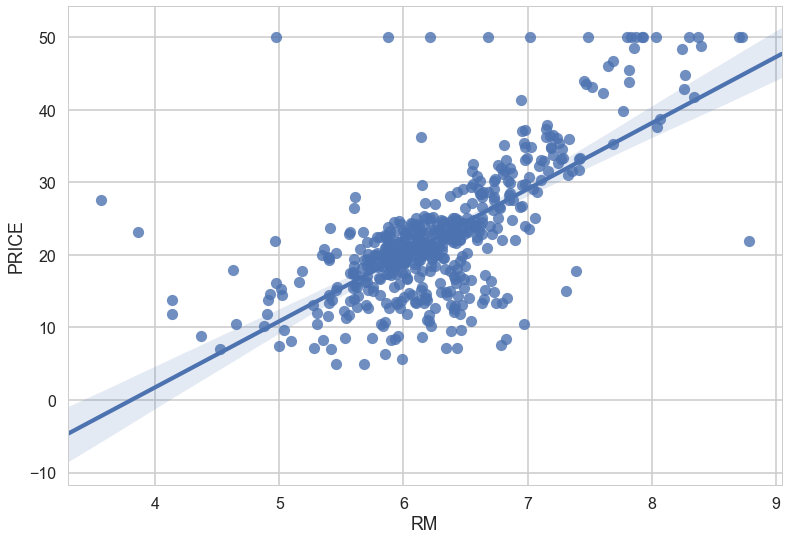

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


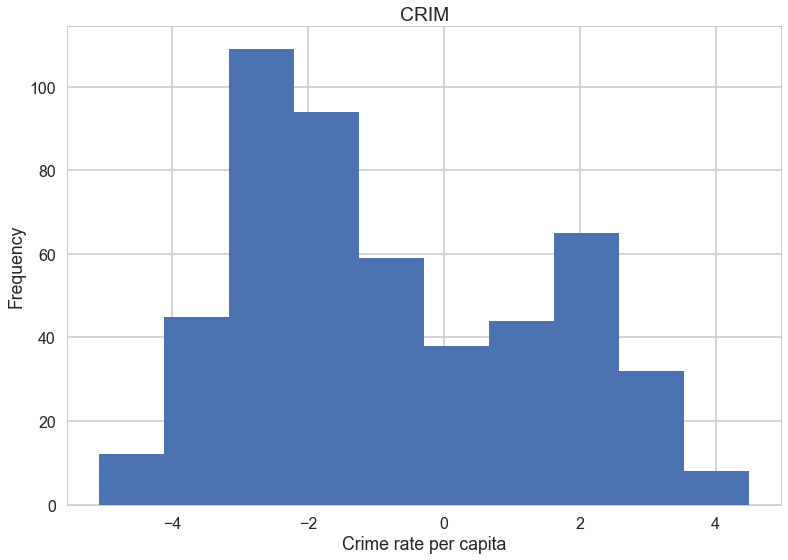

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Exercise 1: Below is the same histogram that was created above without the logarithmic transformation.


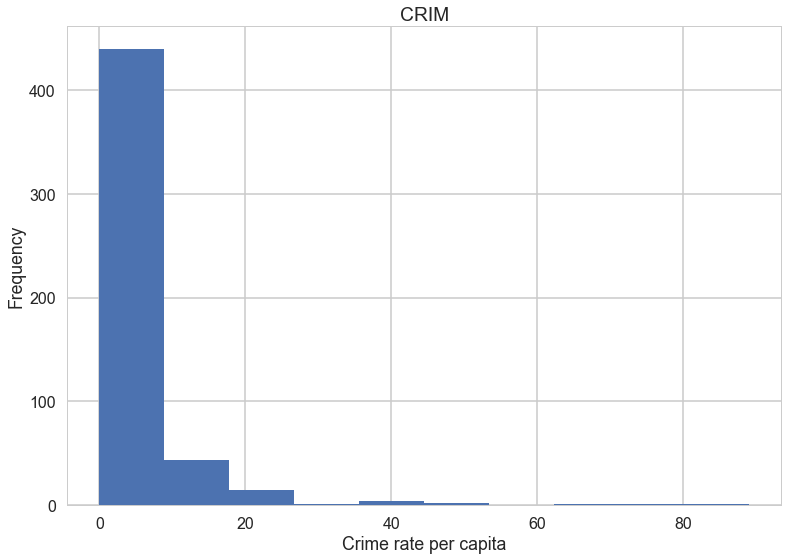

In [20]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Without the logarithmic transformation, it is difficult to interpret what's going on with the majority of the plot because the results are so heavily skewed towards the first bin. The purpose of making this transformation is to be able to attempt to remove obfuscation that occurs due to skewedness, and hopefully be able to see if there is further insights to be gained in the distribution of this variable by breaking up the first bin into more granular bins, and to combine the later bins together into more substantial samples. In this case, we see that the distribution of households by this variable is more segmented in the 'low values of crime rate per capita' than was initially apparent. With the transformation, there are more households in some of the higher crime rate bins than the lowest crime rate bin. Also, perhaps most interestingly, we can see that this distribution is bi-modal, meaning there is a peak in the number of households existing in one of the higher crime rate bins. Looking back at the histogram without the transformatoin, we can see that this did indeed exist, but was just overpowered by the sample in the lowest valued bin.

Exercise 2: Here are histogram plots of the variables from earlier in the project using seaborne. These do not suffer the same skewedness as the crime rate variable did, so I will not apply the logarithmic transformation to them.

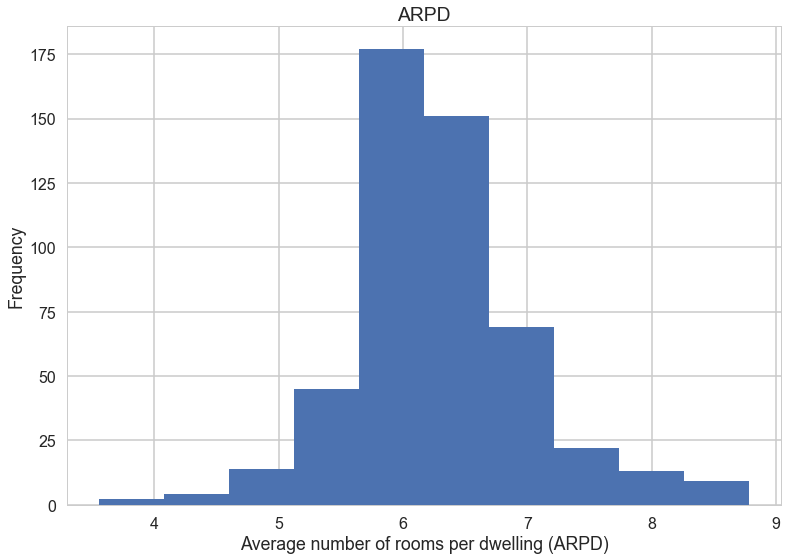

In [21]:
plt.hist(bos.RM)
plt.title("ARPD")
plt.xlabel("Average number of rooms per dwelling (ARPD)")
plt.ylabel("Frequency")
plt.show()

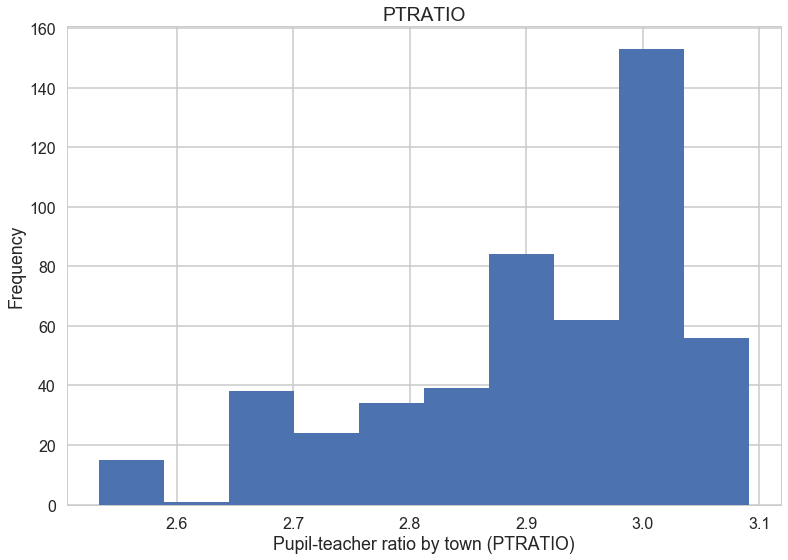

In [22]:
plt.hist(np.log(bos.PTRATIO))
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Frequency")
plt.show()

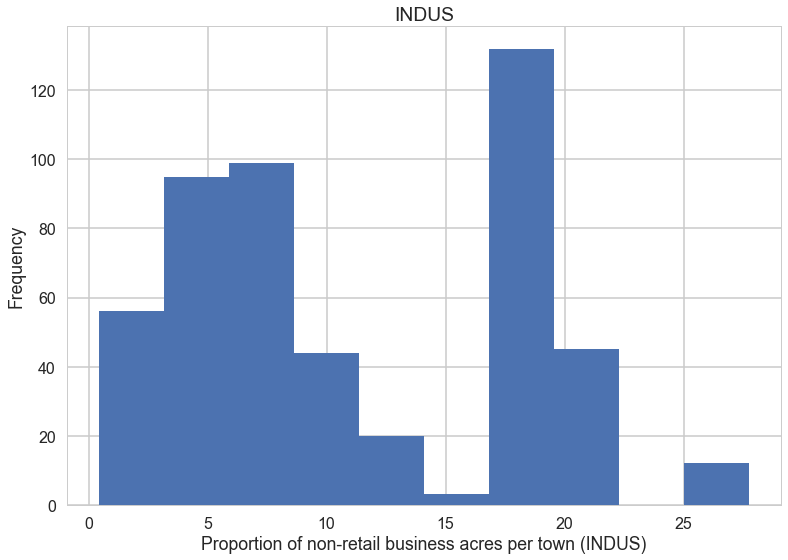

In [23]:
plt.hist(bos.INDUS)
plt.title("INDUS")
plt.xlabel("Proportion of non-retail business acres per town (INDUS)")
plt.ylabel("Frequency")
plt.show()

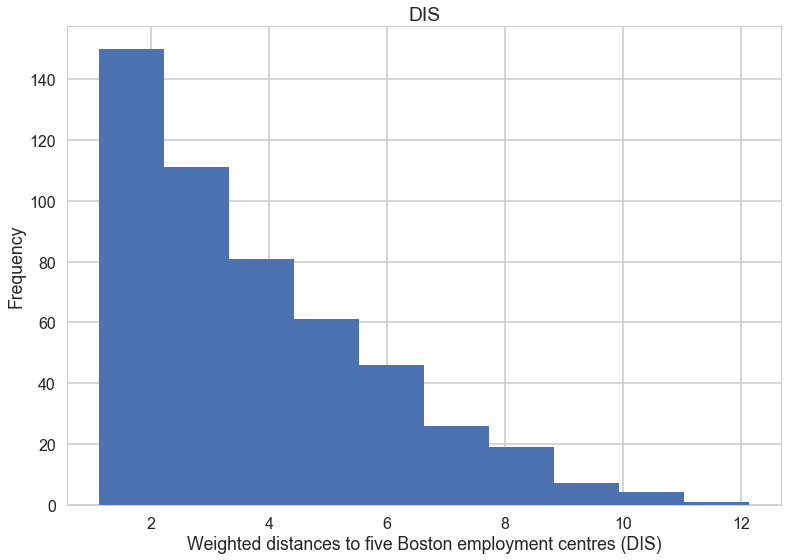

In [24]:
plt.hist(bos.DIS)
plt.title("DIS")
plt.xlabel("Weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Frequency")
plt.show()

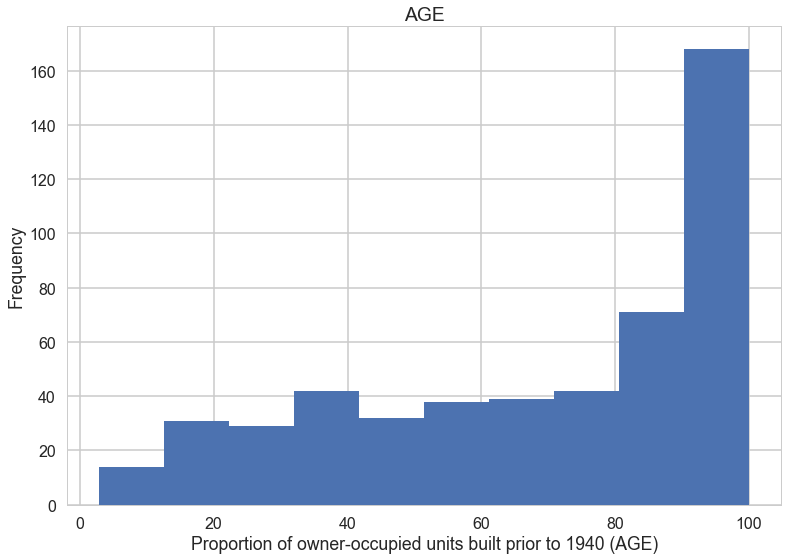

In [25]:
plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        23:43:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

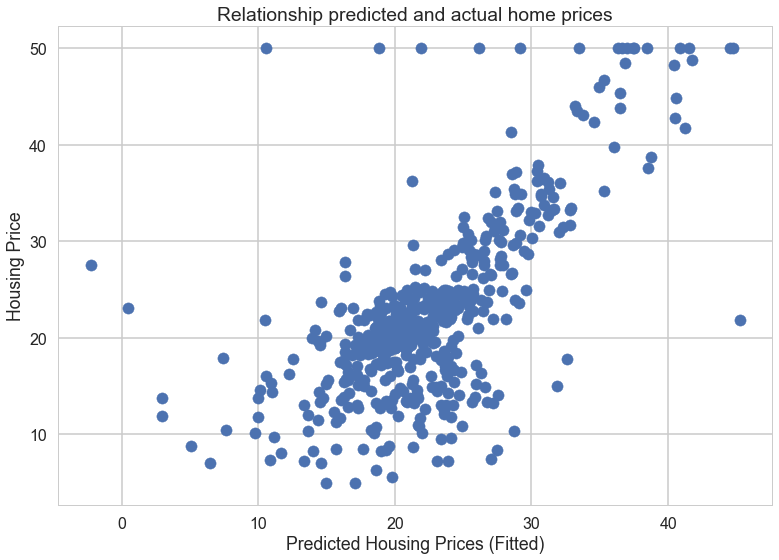

In [28]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Housing Prices (Fitted)")
plt.ylabel("Housing Price")
plt.title("Relationship predicted and actual home prices")

The plot looks very similar to the plot of Average number of rooms per dwelling versus housing price, except for that the x axis is now a different label of 'Predicted Housing Prices' with a different scale instead of what it originally was with the Average number of rooms per dwelling. This makes sense as our current model uses APRD as the only dependent variable. This is a linear transformation of APRD to housing prices. Below is the scatter plot of Average number of rooms per dwelling versus housing price for convenience.

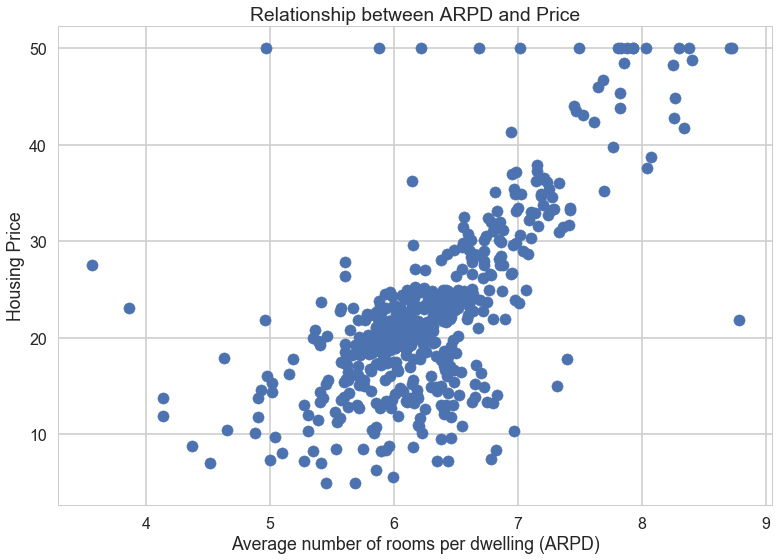

In [29]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (ARPD)")
plt.ylabel("Housing Price")
plt.title("Relationship between ARPD and Price")

### Fitting Linear Regression using `sklearn`


In [30]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [31]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


Exercise 1: First, we could simply feed the LinearRegression model a parameter to not fit the intercept if we desired to do so. See the code directly below. If we were executing a linear regression on a different set of variables, it would be possible that not having an intercept could make more sense. For instance, if we were fitting our data on just 'Number of rooms in the home', one could argue that the linear regression should go through the origin, as a home with zero rooms could logically equate to zero worth. However, even in cases like these, it is not necessarilly sufficient to say that because of the nature of the variable, Y=0 when X=0, thus a intercept should not be fitted. Particularly if the majority of points are not near the origin, forcing a linear regression to go through the origin might be inappropriate. The paper in the link above references a quote from Hocking (Hocking, R.R. (1996). Methods and Applications of Linear Models: Regression and Analysis of Variance. New York: John Wiley) where he says 'if the data are far from the origin, we have no evidence that the linearity applies over this expanded range. For example, the response may increase exponentially near the origin and then stabilize into a near linear response in the region of typical inputs.' The paper then goes on further to say 'Alternatively, observations at the origin may represent a discontinuity from an otherwise linear function with a positive or negative intercept.'
Particularly given that this linear regression is multivariate, and that several of the independent variables would not go through the origin, I would recommend using an intercept in this case. We could go through the exercise of testing whether this is a valid assumption by giving a null hypothesis of the intercept being equal to zero and running a t-test on the hypothesis, as the paper from the link stated.

In [33]:
lm2 = LinearRegression(fit_intercept=False)

Exercise 2: When we say the residuals are i.i.d (independently and identically distributed), we're saying that each of the residuals has to have been derived from the same probability distribution, and that all of the residuals must be mutually independent. To say that the residuals are normally distributed implies that the second part of this criteria has been satisfied, but does not necessarily guarantee the first part, namely that they are independent. It is possible that the residuals are not independent if they are taken in sequence and there is some relationship between them as a result. I found the answer from Dilip Sarwate from the following like to be particularly enlightening ([link](http://stats.stackexchange.com/questions/126785/example-of-a-random-variable-that-is-not-iid)).

Exercise 3: This is false. Both the dependent and independent variables can take on a variety of distributions and still be valid for use in a linear regression; one need not make any assumptions about the nature of the distributions of the dependent or independent variables in order to make use of a linear regression.  It is only the residuals that need to be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4911032804


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Exercise 1:

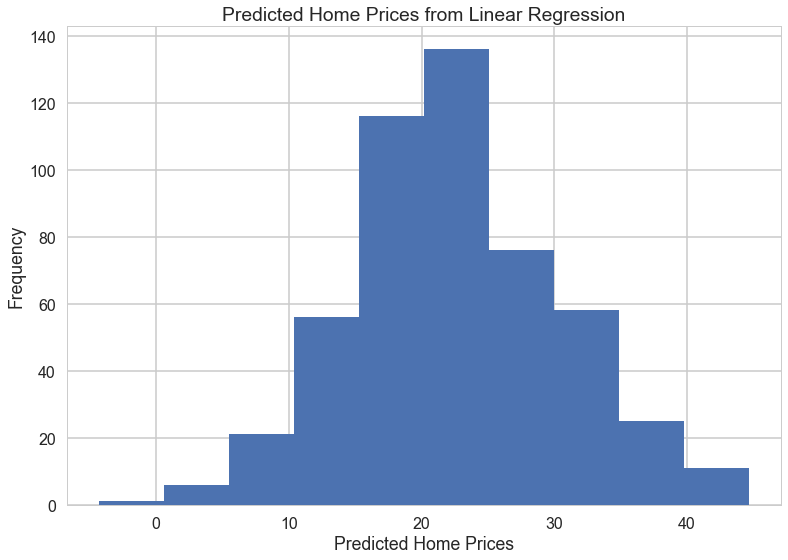

count    506.000000
mean      22.532806
std        7.914896
min       -4.283009
25%       17.447270
50%       22.120625
75%       27.412587
max       44.673399
dtype: float64

In [38]:
plt.hist(lm.predict(X))
plt.title("Predicted Home Prices from Linear Regression")
plt.xlabel("Predicted Home Prices")
plt.ylabel("Frequency")
plt.show()
pd.Series(lm.predict(X)).describe()

In [39]:
pd.Series(lm.predict(X)).sort_values().head()

414   -4.283009
374    0.780211
412    1.693474
384    3.276465
490    3.658252
dtype: float64

In [40]:
pd.Series(lm.predict(X)).sort_values().tail()

163    41.851223
203    42.028796
204    43.185827
257    43.294594
283    44.673399
dtype: float64

The distribution of the predicted prices appears to be distributed normally, with a mean of 22.53 and a standard deviation of about 7.9. I noticed that the maximum predicted home price is 44.67, which is significantly less than the maxiumum price in the dataset, 50, which appears multiple times. Also, there is a predicted negative home value yielded from the model, which is an unlikely scenario in real life, and does not occur within our observations. This might occur for some of the reasons that were discussed in the discussion surrounding whether or not to fit the model through the origin (i.e. not incorporate an intercept into the model). The dependent variable may interact with the independent variable in a non-linear way as the dependent variable approaches the origin. The dependent variable may also not interact with the independent variables in a truly linear way at all, and our linear regression model is forcing this to be the case. My inclination is to not do anything special with this datapoint as removing may cause our model to deteriorate in other ways.

Exercise 2: Fit true prices compared to predicted prices

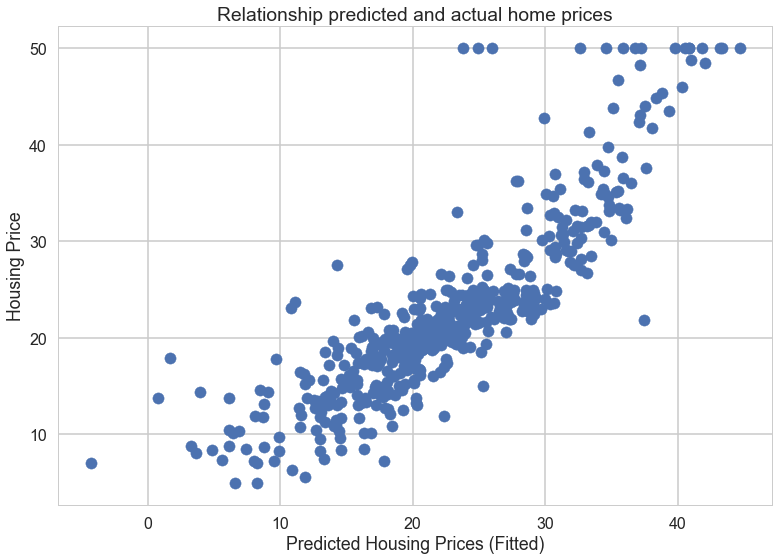

In [41]:
plt.scatter(lm.predict(X), bos.PRICE)
plt.xlabel("Predicted Housing Prices (Fitted)")
plt.ylabel("Housing Price")
plt.title("Relationship predicted and actual home prices")

There is a positive correlation between the predicted housing prices and the actual housing prices, which is a good sign as it shows that the model has some ability to predict housing prices given the parameters from the dataset. If it were a perfect predictor, then the plot would simply be a line of points from the origin with a slope of 1. It clearly isn't that, but it's not horribly far from that either. As mentioned before, it does not predict the point to the left of the origin well (with a predicted home price of less than zero), and it has some trouble with the homes where the value equals 50.

Exercise 3: Scikit-learn is handy from the perspective that all the machine learning models follow the same basic API, so that once you're familiar with the basics of one model then you can have an idea as to how other models within the package as well. It is fairly easy to work with. Statsmodels has the very handy summary function which outputs many interesting statistics regarding the regression that are not readily available through the Scikit-learn function. It also has an R-like syntax, so it may be easy for people to pick up who are already familiar with R. Overall, it appears that statsmodels provides a better interface for those who are interested in diving into the details regarding the statistics revolving around linear regression. There are also other versions of least squares that are readily availabile through this package.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [42]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.2762841


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [43]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.20358010301e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

Exercise 1: Let's create a linear regression model using only pupul to teacher ratio by town.

In [44]:
X1 = bos['PTRATIO']
X1 = X1.values.reshape(-1,1)

# This creates a LinearRegression object
lm2 = LinearRegression()
lm2

# Use PTRATIO predictors to fit linear regression model
lm2.fit(X1, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lm2.coef_

array([-2.1571753])

In [46]:
lm2.intercept_

62.344627474832663

The interpretation of these statistics is as follows: according to the model, as the pupil-teacher ratio increases by one, the value of the home drops by $2157 (i.e. the slope of this regression line is -2.157). The line intercepts the Y-axis at a value of 62.34. This value in and of itself doesn't make sense, but can be interpreted as 'a home in a town with a zero pupils to teacher ratio is predicted to have a value of $62,344).

Exercise 2: Now I'll calculate an R-squared value.

In [47]:
import sklearn.metrics as metrics

In [48]:
r2 = metrics.r2_score(bos['PRICE'], lm2.predict(X1))
print r2

0.257847318009


The r-squared variable tells us 'the percentage of the variance in the response variable that can be explained by the linear regression model.' This value is between 0 and 1, with a value closer to one signifying that a large amount of the variance being explained by the model. A value of .257 is rather low and may be a sign that our model is not very predictive of the dependent variable.

Exercise 3: Here I will calculate the F-statistic:

In [49]:
N = len(X1)
K = 1

In [50]:
F = (r2 / (1- r2)) * ((N - K - 1) / K)
print F

175.105542876


... and after some work, I'm discovering that it may have been easier to do this with the statsmodels package. I will run the regression with that package and it can serve as a way to double check my work!

In [51]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           1.61e-34
Time:                        23:43:51   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The same r-squared and F-statistics were calculated both ways. The statsmodels output conveniently gives us a p-value for the F-statistic, which is very small. Since the null hypothesis is that all of the B coefficients are zero and that they don't have an effect on Y, and the p-value says that there is an extremely small chance that the the null hypothesis could be correct while also randomly getting the results that we received, we can confidently reject the null hypothesis. Since we only have one independent variable, PTRATIO, we can safely say that this variable has some effect on the outcome of our dependent variable, the price of a home.

Exercise 4: In this case, the value of the t-statistic squared is equal to the F-statistic. In this case, the t-statistic is testing whether the PTRATIO variable explains the variance of the PRICE variable, and the F-statistic is testing whether any of the independent variables explains the variance of hte PRICE variable. Since there is only one independent variable, the two statistics are essentially coming up with the same result.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

Exercise 1: First I will create the regression model.

In [52]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           1.09e-97
Time:                        23:43:51   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

The p-value associated with the F-statistic is again very small. The null hypothesis again was that all of the Beta values were zero, and thus that none of the independent values had any explanatory power of the variance of the dependent value. Since the p-value is so small, we can reject the null hypothesis and conclude that at least one of the explanatory variables explains at least part of the variance of the dependent variable.

Exercise 2: The R-squared value is .593. Again, the R-squared value gives 'the percentage of the variance in the response variable that can be explained by the linear regression model.' This isn't an extremely high value, but it does suggest that a fair amount of the variance of the dependent variables can be explained using just these three variables.

Exercise 3: First, all three of the variables appear to be significant in their own right. We can tell this because the t-statistic for all three variables is large, where we are testing against a null hypothesis that those variables have coefficients equal to zero. The p-values are nearly zero, meaning that we can safely reject the null hypothesis that the coefficient for these variables in the regression are zero for all three variables.
The CRIM variable (per capita crime by town) has a coefficient of -0.2, meaning that the price of a home goes down by \$200 for every point that the CRIM variable goes up. The RM variable (average number of rooms per dwelling), has a coefficient of 7.38, meaning that the price of a home goes up \$7,382 for every extra room on average that dwellings have in the area. Last, the PTRATIO (pupil-teacher ratio by town) has a coefficient of -1.07, meaning that as the pupil to teacher ratio goes up by one, the price of a home goes down by \$1,074.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

I will add the extra explanatory variable of DIS (weighted distances to five Boston employment centres). I will first calculate an F-statistic on the comparison of the two models.

In [53]:
X_init = bos[['CRIM','RM','PTRATIO']]

# This creates a LinearRegression object
lm4 = LinearRegression()
lm4.fit(X_init, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
X_new = bos[['CRIM','RM','PTRATIO','DIS']]

# This creates a LinearRegression object
lm5 = LinearRegression()
lm5.fit(X_new, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
RSS_init = np.sum((bos.PRICE - lm4.predict(X_init)) ** 2)
print RSS_init

17367.8410617


In [56]:
RSS_new = np.sum((bos.PRICE - lm5.predict(X_new)) ** 2)
print RSS_new

17367.0151505


In [57]:
F_compare = ((RSS_init - RSS_new)/((N - 3 - 1) - (N - 4 - 1)))/(RSS_new/(N - 4 - 1))

In [58]:
print F_compare

0.0238257122882


The interpretation of the F-test is as follows: The null hypothesis is that the simpler model is statistically better than the more elaborate model. We could reject the null hypothesis if the F-statistic was significantly large (looking up the value on an F-table taking into consideration the number of degrees of freedom of the differences of the two models versus the number of defgrees of freedom of the more complicated model... [details here](http://people.reed.edu/~jones/Courses/P24.pdf)), which would lead to p-value small enough to reject the null hypothesis (let's say, less than .05). However, this F value is very small, so that leaves us unable to reject the null hypothesis, and we are forced to conclude that the simpler model is indeed better. This intuitively makes sense, as the Residual Sum of Squares between the two models is not markedly different.

In [59]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           1.83e-96
Time:                        23:43:51   Log-Likelihood:                -1612.5
No. Observations:                 506   AIC:                             3235.
Df Residuals:                     501   BIC:                             3256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3936      4.081     -0.832      0.4

Comparing the AIC values between the two models confirms the previous finding. In fact, the AIC value in the new model is even a bit higher than the old model, suggesting that the new model is even a bit worse.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Exercise 1: Fitted values versus residuals plot


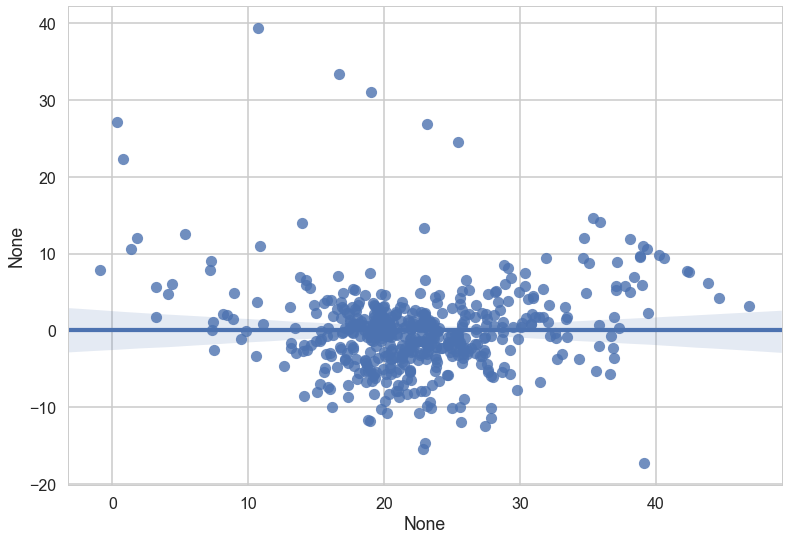

In [60]:
sns.regplot(y=m3.resid, x=m3.fittedvalues, fit_reg = True)

There is an assumption that the error terms from the linear regression are normally distributed. The plot of fitted values versus residuals helps us to find if this is not the case. If there were some pattern here it would alert us to the error terms not being normally distributed. I do not see any sort of particular pattern here (the best fit line is also flat), so I will assume that this assumption has been upheld.

Exercise 2: Create a quantile plot of the residuals.

In [61]:
import statsmodels.graphics.gofplots as gplot

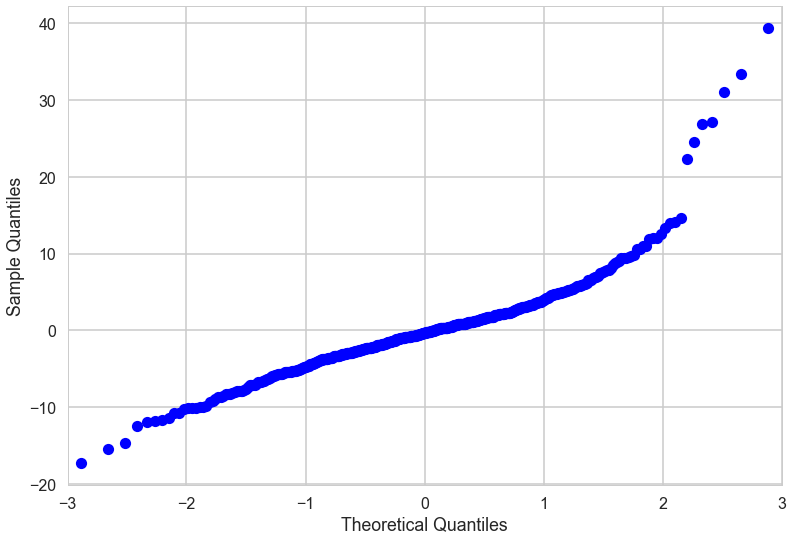

In [68]:
gplot.qqplot(m3.resid);

Here, if the residuals were normally distributed, we would expect a straight line of points in a linear fashion from the lower left to the upper right (through the origin). This is not quite the case, which may be a signal that the residuals are not normally distributed.

Exercise 3: The fitted values versus residuals plot is a bit more intuitive to interpret, as it's just a normal scatterplot that one is trying to find patterns in. However, it might be difficult to interpret situations between 'there's clearly random' and 'clearly a pattern'. On the other hand, the quantile plot is a bit more difficult to interpret, especially for those with minimal experience with them. On the pro side though, once one can interpret them, one can at least easily tell if everything is normal versus something going slightly awry. 

Exercise 4: 

Exercise 5: Construct a leverage plot and identify high leverage points.

In [63]:
from statsmodels.graphics.regressionplots import *

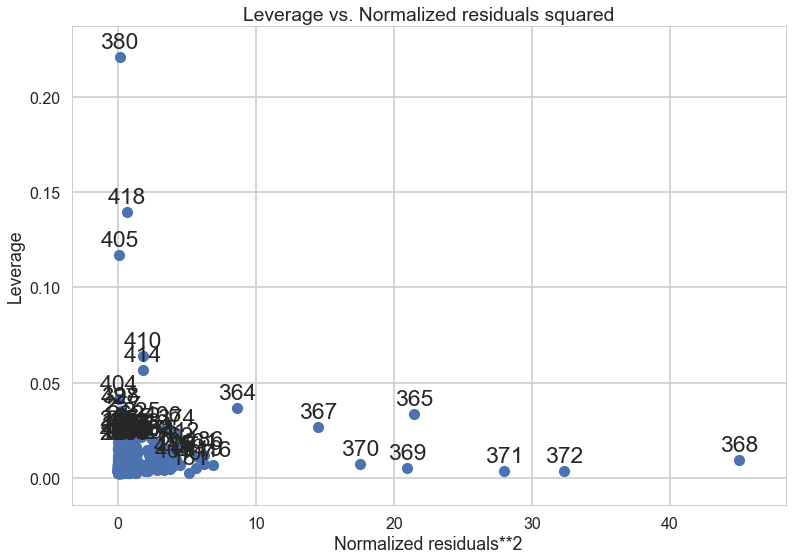

In [66]:
plot_leverage_resid2(m3);

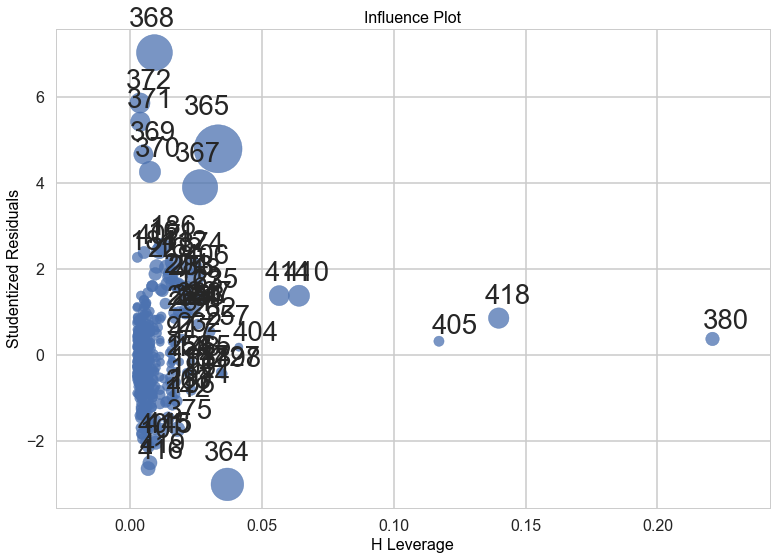

In [114]:
influence_plot(m3);

I will delete points 380, 418, and 405 to use in a new regression

In [110]:
newbos = bos.copy()
newbos = newbos.drop(380, axis=0)
newbos = newbos.drop(418, axis=0)
newbos = newbos.drop(405, axis=0)
newbos = newbos.drop(410, axis=0)
newbos = newbos.drop(414, axis=0)
newbos = newbos.drop(368, axis=0)

In [111]:
m10 = ols('PRICE ~ CRIM + RM + PTRATIO', newbos).fit()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     271.1
Date:                Mon, 13 Mar 2017   Prob (F-statistic):          3.88e-104
Time:                        00:10:20   Log-Likelihood:                -1568.6
No. Observations:                 500   AIC:                             3145.
Df Residuals:                     496   BIC:                             3162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9902      3.864     -1.291      0.1

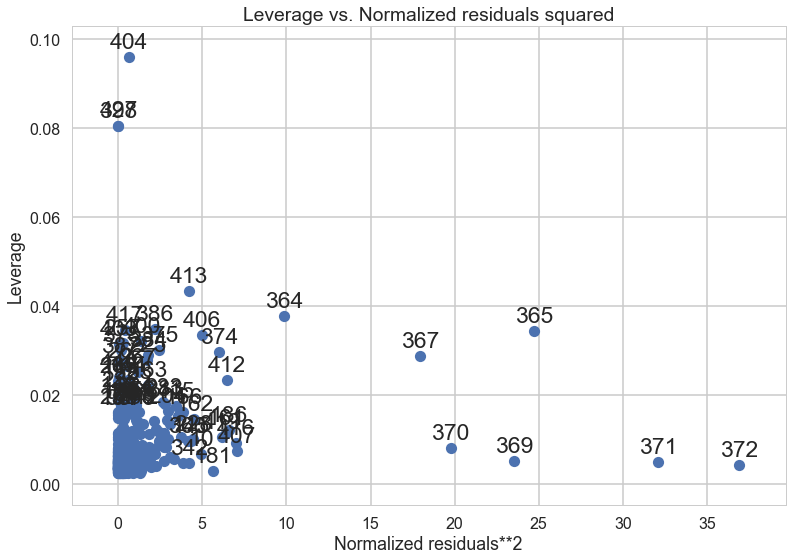

In [112]:
plot_leverage_resid2(m10);